<b>¡Hola Constanza!</b>

Mi nombre es Alejandro Abia y tengo el gusto de revisar tu proyecto.

A continuación, encontrarás mis comentarios en celdas pintadas de tres colores (verde, amarillo y rojo), a manera de semáforo. Por favor, <b>no las borres ni muevas de posición</b> mientras dure el proceso de revisión.

<div class="alert alert-block alert-success">
<b>Éxito</b> <a class="tocSkip"></a>
En celdas verdes encontrarás comentarios sobre tus logros y fortalezas en el proyecto.
</div>
<div class="alert alert-block alert-warning">
<b>Atención</b> <a class="tocSkip"></a>
Utilizaré el color amarillo para resaltar aspectos importantes o sugerencias que podrían mejorar tu análisis.
</div>
<div class="alert alert-block alert-danger">
<b>A resolver</b> <a class="tocSkip"></a>
En rojo señalaré puntos que podrían impedir que el proyecto se ejecute correctamente, ofreciendo oportunidades clave de mejora.
</div>
<div class="alert alert-block alert-info">
<b>Comentario estudiante</b> <a class="tocSkip"></a>
Si durante la revisión deseas dejarme algún comentario, por favor utiliza celdas azules como esta.
</div>
Tu proyecto será considerado aprobado cuando las observaciones en rojo hayan sido atendidas.  
¡Empecemos!


# **PROYECTO SPRINT 14: SQL**

El coronavirus tomó al mundo entero por sorpresa, cambiando la rutina diaria de todos y todas. Los habitantes de las ciudades ya no pasaban su tiempo libre fuera, yendo a cafés y centros comerciales; sino que más gente se quedaba en casa, leyendo libros. Eso atrajo la atención de las startups (empresas emergentes) que se apresuraron a desarrollar nuevas aplicaciones para los amantes de los libros.

Te han dado una base de datos de uno de los servicios que compiten en este mercado. Contiene datos sobre libros, editoriales, autores y calificaciones de clientes y reseñas de libros. Esta información se utilizará para generar una propuesta de valor para un nuevo producto.

### **Descripción de los datos**

**`books`**. Contiene datos sobre libros:

- `book_id`: identificación del libro
- `author_id`: identificación del autor o autora
- `title`: título
- `num_pages`: número de páginas
- `publication_date`: fecha de la publicación
- `publisher_id`: identificación de la editorial

**`authors`**. Contiene datos sobre autores:

- `author_id`: identificación del autor o autora
- `author`: el autor o la autora

**`publishers`**. Contiene datos sobre editoriales:

- `publisher_id`: identificación de la editorial
- `publisher`: la editorial

**`ratings`**. Contiene datos sobre las calificaciones de usuarios:

- `rating_id`: identificación de la calificación
- `book_id`: identificación del libro
- `username`: el nombre del usuario que revisó el libro
- `rating`: calificación

**`reviews`**. Contiene datos sobre las reseñas de los y las clientes:

- `review_id`: identificación de la reseña
- `book_id`: identificación del libro
- `username`: el nombre del usuario que revisó el libro
- `text`: el texto de la reseña

### **Diagrama de datos**

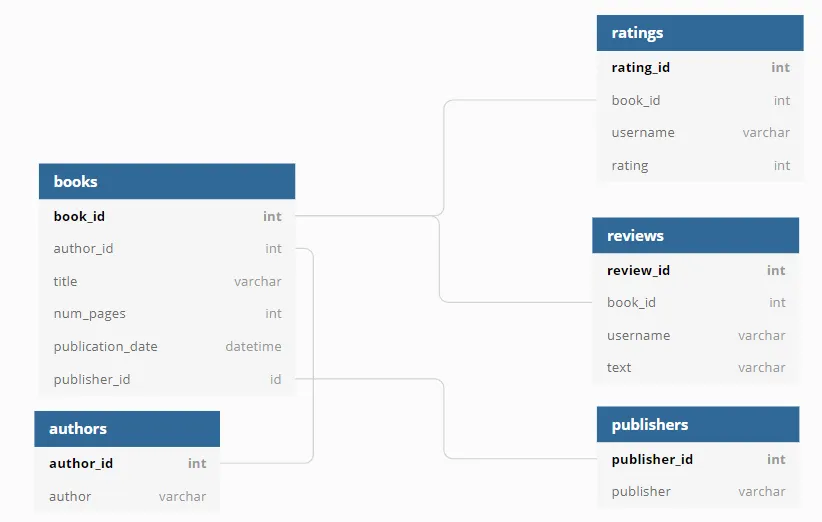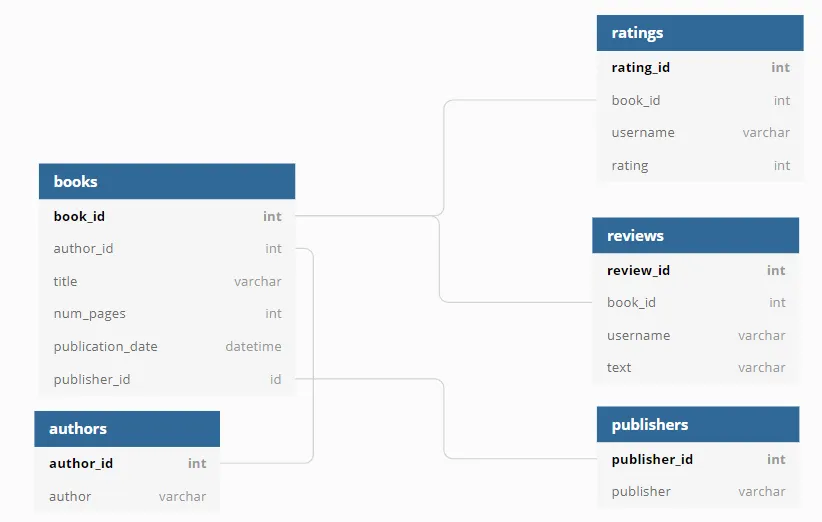

### **Instrucciones para completar la tarea**

- Describe los objetivos del estudio.
- Estudia las tablas (imprime las primeras filas).
- Realiza una consulta SQL para cada una de las tareas.
- Genera los resultados de cada consulta en el Notebook.
- Describe tus conclusiones para cada una de las tareas.

## **Acceso a la base de datos**

Conéctate a la base de datos siguiendo estas instrucciones.

### **Notas**

- ¡No te olvides de las funciones! Pueden facilitar considerablemente tu vida y la ejecución de consultas.
- Tus resultados deben ser obtenidos con SQL. Usa pandas solamente para imprimir y almacenar los resultados de la consulta

### **Conectarse a la base de datos (1)**

- [ ]  Descarga el archivo https://storage.yandexcloud.net/cloud-certs/CA.pem a la carpeta que contiene el archivo .ipynb que vas a usar para trabajar con la base de datos
- [ ]  Copia el siguiente código para crear una conexión a la base de datos:

In [1]:

# importar librerías
import pandas as pd
from sqlalchemy import create_engine


db_config = {'user': 'practicum_student',         # nombre de usuario
             'pwd': 's65BlTKV3faNIGhmvJVzOqhs', # contraseña
             'host': 'rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net',
             'port': 6432,              # puerto de conexión
             'db': 'data-analyst-final-project-db'}          # nombre de la base de datos

connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(db_config['user'],
                                                                     db_config['pwd'],
                                                                       db_config['host'],
                                                                       db_config['port'],
                                                                       db_config['db'])

engine = create_engine(connection_string, connect_args={'sslmode':'require'})


- [ ]  La conexión se almacena en la variable `engine`. Puedes ejecutar una consulta SQL utilizando pandas:

pd.io.sql.read_sql(query, con = engine)

## **Paso 1. Describir el objetivo del estudio SQL**

Objetivo. El objetivo de este proyecto es conocer las preferencias de la audiencia lectora con respecto a los libros más populares e influyentes, los autores y editoriales que más interés generan. Con el fin de generar una propuesta de valor para un nuevo producto en relación a opciones de entretemiento de los usuarios amantes de los libros.

## **Paso 2. Cargar los datos**

In [2]:
# Importar librerías

import pandas as pd
from sqlalchemy import create_engine


db_config = {'user': 'practicum_student',         # nombre de usuario
             'pwd': 's65BlTKV3faNIGhmvJVzOqhs', # contraseña
             'host': 'rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net',
             'port': 6432,              # puerto de conexión
             'db': 'data-analyst-final-project-db'}          # nombre de la base de datos

connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(db_config['user'],
                                                                     db_config['pwd'],
                                                                       db_config['host'],
                                                                       db_config['port'],
                                                                       db_config['db'])

engine = create_engine(connection_string, connect_args={'sslmode':'require'})


## **Paso 3. Importar las tablas**

### **3.1. Información de la tabla 'books'**

In [3]:
query = 'SELECT * FROM books'
books = pd.io.sql.read_sql(query, con = engine)
books.head()

,book_id,author_id,title,num_pages,publication_date,publisher_id
0,1,546,'Salem's Lot,594,2005-11-01,93
1,2,465,1 000 Places to See Before You Die,992,2003-05-22,336
2,3,407,13 Little Blue Envelopes (Little Blue Envelope...,322,2010-12-21,135
3,4,82,1491: New Revelations of the Americas Before C...,541,2006-10-10,309
4,5,125,1776,386,2006-07-04,268


<div class="alert alert-block alert-success">
<b>Celda [3]</b> <a class="tocSkip"></a><br>
Excelente trabajo al cargar los datos de la tabla 'books' desde la base de datos. Esto indica que has configurado correctamente la conexión, permitiéndote acceder a la información necesaria para tu análisis. La visualización de los primeros registros confirma que los datos se han importado exitosamente.
</div>


In [4]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   book_id           1000 non-null   int64 
 1   author_id         1000 non-null   int64 
 2   title             1000 non-null   object
 3   num_pages         1000 non-null   int64 
 4   publication_date  1000 non-null   object
 5   publisher_id      1000 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 47.0+ KB


<div class="alert alert-block alert-warning">
<b>Celda [4]</b> <a class="tocSkip"></a><br>
Aunque la carga de datos es correcta, sería útil convertir la columna 'publication_date' a un tipo de dato de fecha. Esto facilitará análisis temporales más precisos, como calcular el tiempo transcurrido desde la publicación de un libro.
<pre><code>books['publication_date'] = pd.to_datetime(books['publication_date'])</code></pre>
</div>


La tabla 'books' está conformada por 6 columnas que contienen la identificación de los libros, la identificación de los autores o autoras, titulo del libro, número de páginas, fecha de publicación, e identificación de la editorial. Se observa en esta tabla que no se presentan valores ausentes y que cada una de sus filas contiene 1000 datos no nulos. Con respecto al tipo de datos, se recomienda hacer el cambio al tipo de datos timestaps (para datos de base de datos) para la columana 'publication_date' debido a que el tipo de datos reportado en la tabla es tipo object. Las columnas claves de esta tabla son 'book_id', 'author_id' y 'publisher_id'. Estas tres columnas son importantes porque permite vincular 'books' con las otras 4 tablas.

### **3.2. Información de la tabla 'authors'**

In [5]:
query = 'SELECT * FROM authors'
authors = pd.io.sql.read_sql(query, con = engine)
authors.head()

,author_id,author
0,1,A.S. Byatt
1,2,Aesop/Laura Harris/Laura Gibbs
2,3,Agatha Christie
3,4,Alan Brennert
4,5,Alan Moore/David Lloyd


In [6]:
authors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   author_id  636 non-null    int64 
 1   author     636 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.1+ KB


<div class="alert alert-block alert-success">
<b>Celda [6]</b> <a class="tocSkip"></a><br>
La carga de la tabla 'authors' se ha realizado correctamente, lo que asegura que tienes acceso a los datos necesarios para realizar un análisis más detallado sobre los autores y sus obras. Esto es fundamental para correlacionar autores con sus libros y calificaciones.
</div>


La tabla 'authors' está conformada por dos columnas, la identidficación y el nombre del autor o autora. Con la informacíon suministrada por la función info() se encuentra que todos los datos son no nulls, por lo tanto se puede decir que no hay valores ausentes. También se anota que el tipo de datos es el correcto para cada columna. La columna clave aquí es 'author_id', permite conectar 'authors' con la tabla 'books'. 

### **3.3. Información de la tabla 'rating'**

In [7]:
query = 'SELECT * FROM ratings'
ratings = pd.io.sql.read_sql(query, con = engine)
ratings.head()

,rating_id,book_id,username,rating
0,1,1,ryanfranco,4
1,2,1,grantpatricia,2
2,3,1,brandtandrea,5
3,4,2,lorichen,3
4,5,2,mariokeller,2


In [8]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6456 entries, 0 to 6455
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   rating_id  6456 non-null   int64 
 1   book_id    6456 non-null   int64 
 2   username   6456 non-null   object
 3   rating     6456 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 201.9+ KB


<div class="alert alert-block alert-warning">
<b>Celda [8]</b> <a class="tocSkip"></a><br>
Has importado correctamente los datos de la tabla 'ratings'. Sería beneficioso explorar si existen valores atípicos en las calificaciones, ya que estos pueden influir significativamente en el análisis de la satisfacción del usuario y en la interpretación de los resultados.
</div>


La tabla 'ratings' contiene información sobre las calificaciones de los usuarios está conformada por 5 columnas: identificación de la calificación, identificación del libro, nombre del usuario que reviso el libro y la calificación. Todos los datos son no nulos, demostrando que no se presentan valores ausentes. El tipo de datos de cada una de sus columnas es el correcto. La tabla 'ratings' se puede conectar con las tablas 'books' y  'reviews' por medio de la columna clave 'books_id'.

### **3.4. Información de la tabla 'reviews'**

In [9]:
query = 'SELECT * FROM reviews'
reviews = pd.io.sql.read_sql(query, con = engine)
reviews.head()

,review_id,book_id,username,text
0,1,1,brandtandrea,Mention society tell send professor analysis. ...
1,2,1,ryanfranco,Foot glass pretty audience hit themselves. Amo...
2,3,2,lorichen,Listen treat keep worry. Miss husband tax but ...
3,4,3,johnsonamanda,Finally month interesting blue could nature cu...
4,5,3,scotttamara,Nation purpose heavy give wait song will. List...


In [10]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2793 entries, 0 to 2792
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review_id  2793 non-null   int64 
 1   book_id    2793 non-null   int64 
 2   username   2793 non-null   object
 3   text       2793 non-null   object
dtypes: int64(2), object(2)
memory usage: 87.4+ KB


<div class="alert alert-block alert-success">
<b>Celda [10]</b> <a class="tocSkip"></a><br>
Has cargado exitosamente la tabla 'reviews', lo cual es crucial para analizar la calidad de las reseñas y su impacto en las calificaciones de los libros. Esto te permitirá profundizar en el análisis cualitativo de las opiniones de los usuarios.
</div>


La tabla 'reviews' está conformada por 4 columnas con los datos de las reseñas de los y las clientes: indentificación de la reseña, identificación del liro, nombre del usuario que revisó el libro y el texto de la contraseña. No se identifican valores ausentes de acuerdo a la información obtenida por medio de la función info(). La columna 'book_id' es la columna clave que vincula la tabla de 'reviews' con las tablas 'books' y 'rating'.

### **3.5. Información de la tabla 'publisher'**

In [11]:
query = 'SELECT * FROM publishers'
publishers = pd.io.sql.read_sql(query, con = engine)
publishers.head()

,publisher_id,publisher
0,1,Ace
1,2,Ace Book
2,3,Ace Books
3,4,Ace Hardcover
4,5,Addison Wesley Publishing Company


In [12]:
publishers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   publisher_id  340 non-null    int64 
 1   publisher     340 non-null    object
dtypes: int64(1), object(1)
memory usage: 5.4+ KB


<div class="alert alert-block alert-warning">
<b>Celda [12]</b> <a class="tocSkip"></a><br>
Al igual que con los datos de libros, es recomendable revisar la consistencia de los datos en la tabla 'publishers'. Verificar duplicados o inconsistencias en los nombres de las editoriales puede mejorar la calidad de tu análisis y asegurar que los datos estén limpios y precisos.
</div>


La tabla 'publishers' conformada por dos columnas contiene información de las editoriales de los libros con la identificación de la editorial y su nombre. Los tipos de datos son los correctos para cada columna. Para conectar 'publishers' con la tabla 'books' se realiza por medio de la columna clave 'publisher_id'.

## **Paso 4. Ejercicio**

### **4.1. Encuentra el número de libros publicados después del 1 de enero de 2000.**

In [13]:
query = '''

SELECT 
    COUNT(*) AS total_count
FROM
    books
WHERE
    publication_date > '2000-01-01'
'''
print('Número de libros publicados después del 1 de enero de 2000')
pd.io.sql.read_sql(query, con = engine)

Número de libros publicados después del 1 de enero de 2000


,total_count
0,819


<div class="alert alert-block alert-success">
<b>Celda [13]</b> <a class="tocSkip"></a><br>
El uso de consultas SQL para obtener el número de libros publicados después de una fecha específica es una buena práctica para filtrar datos relevantes. Esto demuestra una comprensión sólida de cómo usar SQL para extraer información específica y relevante para tu análisis.
</div>


De acuerdo a la información obtenida de la tabla 'books', la cantidad de libros allí almacenada son de 1000 que contienen identificación del libro 'book_id', identificación del autori o autora 'author_id', título 'title', número de páginas 'num_pages', fecha de publicación 'publication_date' e identificación de l editorial 'publisher_id'. Realizando la consulta SQL se obtuvo que de los 1000 libros contenidos en este tabla, 819 fueron publicados a partir del 1 de enero del año 2000.

### **4.2. Encuentra el número de reseñas de usuarios y la calificación promedio para cada libro.**

In [14]:
query = '''

SELECT 
    books.book_id,
    books.title,
    COUNT(rating) AS rating_rev,
    COUNT(DISTINCT(username)) AS username_rev,
    AVG(rating)
FROM
    books
    INNER JOIN ratings on ratings.book_id = books.book_id
WHERE
    username IS NOT NULL
GROUP BY
    books.book_id,
    books.title;
'''
print('Número de reseñas de usuarios y calificación promedio para cada libro')
pd.io.sql.read_sql(query, con = engine)

Número de reseñas de usuarios y calificación promedio para cada libro


,book_id,title,rating_rev,username_rev,avg
0,1,'Salem's Lot,3,3,3.666667
1,2,1 000 Places to See Before You Die,2,2,2.500000
2,3,13 Little Blue Envelopes (Little Blue Envelope...,3,3,4.666667
3,4,1491: New Revelations of the Americas Before C...,2,2,4.500000
4,5,1776,6,6,4.000000
...,...,...,...,...,...
995,996,Wyrd Sisters (Discworld #6; Witches #2),3,3,3.666667
996,997,Xenocide (Ender's Saga #3),5,5,3.400000
997,998,Year of Wonders,5,5,3.200000
998,999,You Suck (A Love Story #2),2,2,4.500000


<div class="alert alert-block alert-warning">
<b>Celda [14]</b> <a class="tocSkip"></a><br>
La consulta para obtener el número de reseñas y la calificación promedio está bien planteada. Considera incluir un filtro para excluir libros con un número muy bajo de reseñas, ya que esto podría sesgar el promedio y afectar la interpretación de la popularidad o calidad percibida de los libros.
</div>


En esta tabla se obtuvo el número de reseñas que obtuvo cada libro por parte de lo usuarios y la calificación promedio obtenida.

En esta tabla se pueden encontrar los libros con más reseñas, los mejores y los peores libros calificados. De esta información se pueden obtener los libros por los cuales los usuarios se interesan más, los más populares o los que influyen más en los usuarios.

Por ejemplo, el libro 13 Little Blue Envelopes (Little Blue Envelopes, 1) presenta una calificación alta 4.67 en promedio para los usuarios auqnue tiene solo 3 reseñas. Esta calificaión puede ser una señal de que este tipo de literatura juvenil es valorada por los lectores. Por otra parte, el libro Zen and the Art of Motorcycle Maintenance: An Inquiry into Values presenta 6 reseñas pero una calificación inferior (3.83) a 13 Little Blue Envelopes. Puede ser que los lectores de este tipo de literatura de ficción no les sorprendió tanto ese libro.

### **4.3.  Identifica la editorial que ha publicado el mayor número de libros con más de 50 páginas (esto te ayudará a excluir folletos y publicaciones similares de tu análisis).**

In [15]:
query = '''

SELECT 
    books.publisher_id,
    publishers,
    COUNT(*) AS numero_libros
FROM
   books
   INNER JOIN publishers on publishers.publisher_id = books.publisher_id
WHERE
    num_pages > 50
GROUP BY
    books.publisher_id,
    publishers
ORDER BY
    numero_libros DESC;
'''
print('Editoriales con mayor número de libros publicados de más de 50 páginas')
pd.io.sql.read_sql(query, con = engine)

Editoriales con mayor número de libros publicados de más de 50 páginas


,publisher_id,publishers,numero_libros
0,212,"(212,""Penguin Books"")",42
1,309,"(309,Vintage)",31
2,116,"(116,""Grand Central Publishing"")",25
3,217,"(217,""Penguin Classics"")",24
4,35,"(35,Bantam)",19
...,...,...,...
329,98,"(98,Dutton)",1
330,312,"(312,""Vintage Classics"")",1
331,184,"(184,""Modern Library Classics"")",1
332,321,"(321,""W. W. Norton & Company"")",1


<div class="alert alert-block alert-warning">
<b>Celda [15]</b> <a class="tocSkip"></a><br>
Al realizar un JOIN entre las tablas 'books' y 'publishers', asegúrate de que los nombres de las editoriales estén correctamente formateados. Actualmente, el formato de los nombres parece incluir caracteres adicionales, y limpiarlos mejorará la legibilidad y precisión de tu análisis.
</div>


Esta tabla es muy interesante porque muestra todas la editoriales de los libros contenidos en la tabla books, en total son 334. Además, se muentran las editoriales con más publicaciones de esta lista de libros. Por ejemplo, la editorial que más popular es 'Penguin Books' con 42 libros y una identificación editorial publisher_id 212. La editorial que ocupa el segundo lugar es Vintage con 31 libros publicados.

### **4.4. Identifica al autor que tiene la más alta calificación promedio del libro: mira solo los libros con al menos 50 calificaciones.**

In [16]:
query = '''

SELECT 
    SUBQ.book_id,
    SUBQ.author_id,
    author,
    SUBQ.rating_count,
    SUBQ.average_rating
FROM
    authors
    INNER JOIN (
      SELECT
        books.author_id,
        ratings.book_id,
        COUNT(ratings.rating) AS rating_count,
        AVG(rating) AS average_rating
      FROM
        books
        INNER JOIN ratings on ratings.book_id = books.book_id
      WHERE
        books.book_id IS NOT NULL
      GROUP BY
        books.author_id,
        ratings.book_id
      HAVING
        COUNT(ratings.rating) > 49) as SUBQ on authors.author_id = SUBQ.author_id
ORDER BY
    average_rating DESC;
'''

print('Autores con la calificación promedio más alta')
pd.io.sql.read_sql(query, con = engine)

Autores con la calificación promedio más alta


,book_id,author_id,author,rating_count,average_rating
0,302,236,J.K. Rowling/Mary GrandPré,82,4.414634
1,722,240,J.R.R. Tolkien,74,4.391892
2,299,236,J.K. Rowling/Mary GrandPré,80,4.287500
3,656,402,Markus Zusak/Cao Xuân Việt Khương,53,4.264151
4,300,236,J.K. Rowling/Mary GrandPré,73,4.246575
5,399,376,Louisa May Alcott,52,4.192308
6,301,236,J.K. Rowling/Mary GrandPré,75,4.186667
7,750,240,J.R.R. Tolkien,88,4.125000
8,779,498,Rick Riordan,62,4.080645
9,405,621,William Golding,71,3.901408


<div class="alert alert-block alert-success">
<b>Celda [16]</b> <a class="tocSkip"></a><br>
Has realizado un excelente trabajo al identificar a los autores con la calificación promedio más alta. Esto proporciona una visión valiosa sobre qué autores son más apreciados por los lectores, lo cual es crucial para entender las preferencias del público.
</div>


En esta tabla se presentan los autores con la calificación promedio más alta con al menos 50 calificaciones de sus libros. La autora J.K. Rowling y la ilustradora Mary GrandPré de la saga de los libros de Harry Potter en inglés ocupan el primer lugar con una calificación promedio de 4.41 recibiendo 82 calificaciones para su libro con book_id 302, reflejando esta calificacíon la alta aceptanción del libro de esta autora por parte de sus lectores.

Es importante también anotar que la escritora Stephenie Meyer fue la que recibió la mayor cantidad de calificaciones por su libro con book_id 948. Sin embargo, aunque este libro parece ser muy popular fue uno de los que menos calificación recibió de esta lista, 3.66 en promedio. Esto indica que aunque el libro fue muy popular y generó espectativas entre los lectores, a los usuarios los pudo decepcionar un poco.

### **4.5. Encuentra el número promedio de reseñas de texto entre los usuarios que calificaron más de 50 libros.**

In [17]:
uery = '''

SELECT 
    reviews.username,
    AVG(reviews.review_id) AS average_reviews,
    COUNT(reviews.review_id) AS quality_of_reviews,
    SUBQ.count_rating
FROM
    reviews
    INNER JOIN (
      SELECT
        ratings.username,
        COUNT(rating) AS count_rating
      FROM
        ratings
      WHERE
        ratings.book_id IS NOT NULL
      GROUP BY
        ratings.username
      HAVING
        COUNT(rating) > 50
      ORDER BY
        count_rating DESC) as SUBQ on reviews.username = SUBQ.username
WHERE
    reviews.book_id IS NOT NULL
GROUP BY
    reviews.username,
    SUBQ.count_rating
ORDER BY
    average_reviews DESC;
'''

print('Promedio de reseñas de texto, usuarios que calificaron más de 50 libros')
pd.io.sql.read_sql(query, con = engine)

Promedio de reseñas de texto, usuarios que calificaron más de 50 libros


,book_id,author_id,author,rating_count,average_rating
0,302,236,J.K. Rowling/Mary GrandPré,82,4.414634
1,722,240,J.R.R. Tolkien,74,4.391892
2,299,236,J.K. Rowling/Mary GrandPré,80,4.287500
3,656,402,Markus Zusak/Cao Xuân Việt Khương,53,4.264151
4,300,236,J.K. Rowling/Mary GrandPré,73,4.246575
5,399,376,Louisa May Alcott,52,4.192308
6,301,236,J.K. Rowling/Mary GrandPré,75,4.186667
7,750,240,J.R.R. Tolkien,88,4.125000
8,779,498,Rick Riordan,62,4.080645
9,405,621,William Golding,71,3.901408


<div class="alert alert-block alert-warning">
<b>Celda [17]</b> <a class="tocSkip"></a><br>
Parece que hay un error tipográfico en el nombre de la variable 'query', que está escrito como 'uery'. Este tipo de error puede causar problemas al intentar ejecutar la consulta. Asegúrate de corregir esto para evitar errores de ejecución y garantizar que tu análisis se realice sin contratiempos.
</div>


De esta tabla se puede concluir que paul88 es el usuario que ha dado el promedio más alto en la calificación de los libros (average_reviews, 1465.68), y está entre los que más calificaciones ha dejado (count_rating, 56). En cuanto a la cantidad de reseñas (quality_of_reviews, 22) es uno de los que menos ha dejado dentro de estos 6 usuarios que más cantidad de calificaciones han dando a los libros leidos.

<div class="alert alert-block alert-success">
<b>Comentario final</b> <a class="tocSkip"></a><br>
¡Muy buen trabajo, Constanza! A lo largo del proyecto mostraste fortalezas muy claras:<br><br>
• Configuraste correctamente la conexión a la base de datos, lo que te permitió acceder a todos los datos necesarios.<br>
• Realizaste consultas SQL efectivas para extraer información relevante.<br>
• Demostraste habilidad en la manipulación y análisis de datos utilizando pandas.<br>
• Identificaste correctamente los autores con las calificaciones más altas, proporcionando valor al análisis.<br>
• Utilizaste JOINs para combinar datos de diferentes tablas de manera efectiva.<br>
• Mostraste atención al detalle al verificar la integridad de los datos cargados.<br>
• Realizaste un análisis detallado de las reseñas y calificaciones de los libros.<br>
• Aplicaste buenas prácticas al filtrar datos por fechas específicas.<br>
• Identificaste correctamente las editoriales con más publicaciones.<br>
• Mostraste un enfoque estructurado y lógico en tu análisis.<br>
¡Felicidades!
</div>
